Task 1

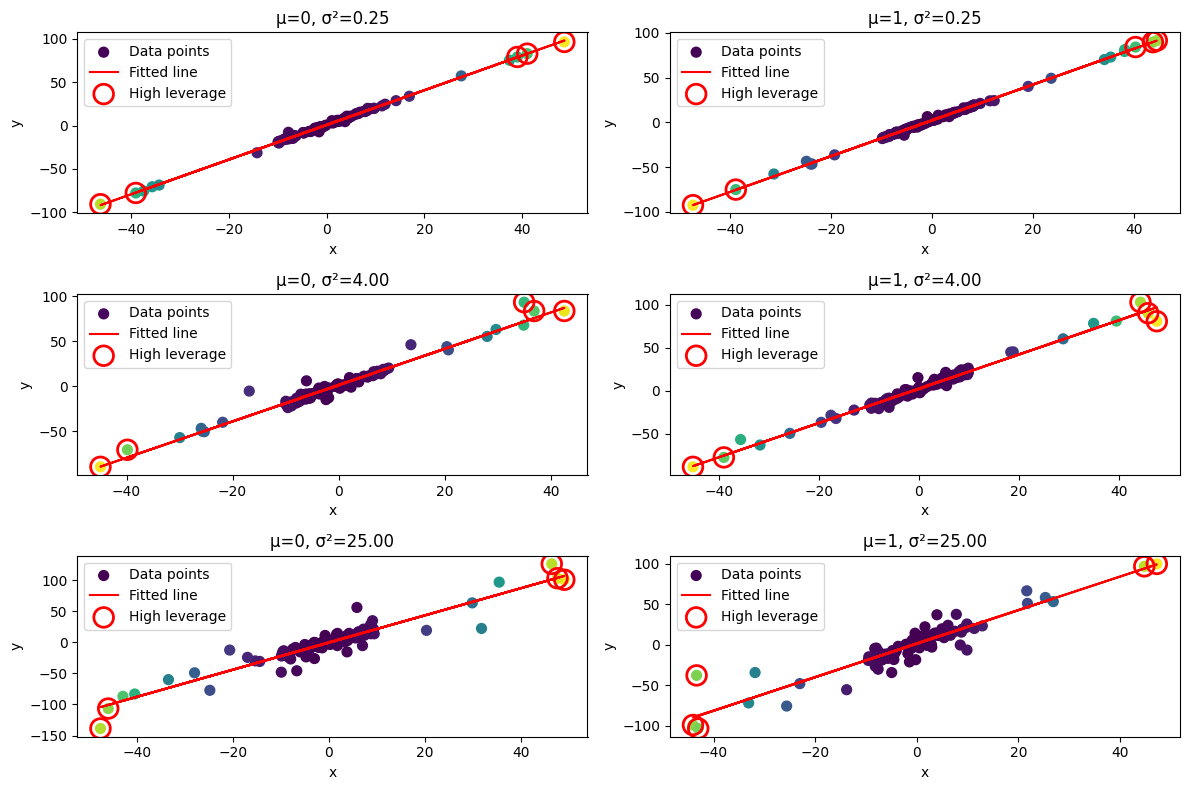

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

def leverage_scores(X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    return np.diag(H)

def generate_data_1d(n=100, mu=0, sigma=1, high_var_x_factor=5, high_var_y_factor=5):
    a, b = 2.0, 1.0

    n_regular = int(n * 0.7)
    x_regular = np.random.uniform(-10, 10, n_regular)
    eps_regular = np.random.normal(mu, sigma, size=n_regular)
    y_regular = a * x_regular + b + eps_regular
    point_type_regular = ['regular'] * n_regular

    n_high_var_x = int(n * 0.1)
    x_high_var_x = np.random.uniform(-10 * high_var_x_factor, 10 * high_var_x_factor, n_high_var_x)
    eps_high_var_x = np.random.normal(mu, sigma, size=n_high_var_x)
    y_high_var_x = a * x_high_var_x + b + eps_high_var_x
    point_type_high_var_x = ['high_variance_x'] * n_high_var_x

    n_high_var_y = int(n * 0.1)
    x_high_var_y = np.random.uniform(-10, 10, n_high_var_y)
    eps_high_var_y = np.random.normal(mu, sigma * high_var_y_factor, size=n_high_var_y)
    y_high_var_y = a * x_high_var_y + b + eps_high_var_y
    point_type_high_var_y = ['high_variance_y'] * n_high_var_y


    n_high_var_both = n - n_regular - n_high_var_x - n_high_var_y
    x_high_var_both = np.random.uniform(-10 * high_var_x_factor, 10 * high_var_x_factor, n_high_var_both)
    eps_high_var_both = np.random.normal(mu, sigma * high_var_y_factor, size=n_high_var_both)
    y_high_var_both = a * x_high_var_both + b + eps_high_var_both
    point_type_high_var_both = ['high_variance_both'] * n_high_var_both


    X_all = np.concatenate([x_regular, x_high_var_x, x_high_var_y, x_high_var_both])
    y_all = np.concatenate([y_regular, y_high_var_x, y_high_var_y, y_high_var_both])
    point_types_all = point_type_regular + point_type_high_var_x + point_type_high_var_y + point_type_high_var_both

    df = pd.DataFrame({'x': X_all, 'y': y_all, 'point_type': point_types_all})
    return df

def plot_leverage_1d(mu_values, sigma_values):
    fig, axes = plt.subplots(len(sigma_values), len(mu_values), figsize=(12, 8))
    for i, sigma in enumerate(sigma_values):
        for j, mu in enumerate(mu_values):
            df = generate_data_1d(mu=mu, sigma=sigma)
            X = df[['x']].values
            y = df['y'].values

            h = leverage_scores(X)
            df['leverage_score'] = h

            model = LinearRegression().fit(X, y)
            y_pred = model.predict(X)

            ax = axes[i, j]
            scatter = ax.scatter(df['x'], df['y'], c=df['leverage_score'], cmap='viridis', s=50, label='Data points')
            ax.plot(df['x'], y_pred, 'r-', label='Fitted line')

            high_leverage_df = df.nlargest(5, 'leverage_score')
            ax.scatter(high_leverage_df['x'], high_leverage_df['y'],
                       edgecolors='red', facecolors='none', s=200, linewidths=2,
                       label='High leverage')

            ax.set_title(f"μ={mu}, σ²={sigma**2:.2f}")
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_leverage_1d(mu_values=[0, 1], sigma_values=[0.5, 2, 5])

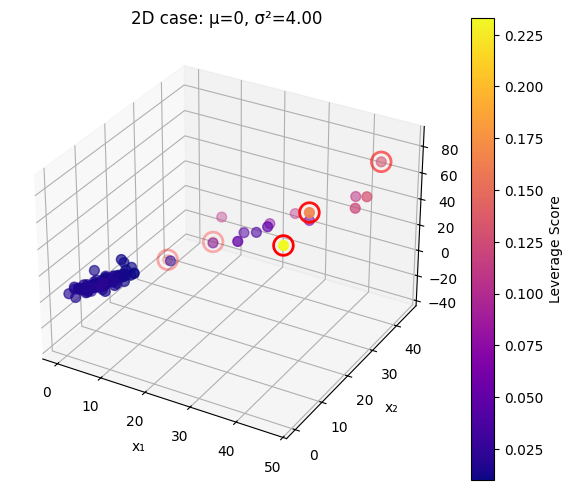

In [ ]:
def generate_data_2d(n=100, mu=0, sigma=1, high_var_x_factor=5, high_var_y_factor=5):
    a, b, c = 2.0, -1.0, 3.0

    n_regular = int(n * 0.7)
    x1_regular = np.random.uniform(0, 10, n_regular)
    x2_regular = np.random.uniform(0, 10, n_regular)
    eps_regular = np.random.normal(mu, sigma, size=n_regular)
    y_regular = a*x1_regular + b*x2_regular + c + eps_regular
    point_type_regular = ['regular'] * n_regular

    n_high_var_x = int(n * 0.1)
    x1_high_var_x = np.random.uniform(0, 10 * high_var_x_factor, n_high_var_x)
    x2_high_var_x = np.random.uniform(0, 10 * high_var_x_factor, n_high_var_x)
    eps_high_var_x = np.random.normal(mu, sigma, size=n_high_var_x)
    y_high_var_x = a*x1_high_var_x + b*x2_high_var_x + c + eps_high_var_x
    point_type_high_var_x = ['high_variance_x1_x2'] * n_high_var_x

    n_high_var_y = int(n * 0.1)
    x1_high_var_y = np.random.uniform(0, 10, n_high_var_y)
    x2_high_var_y = np.random.uniform(0, 10, n_high_var_y)
    eps_high_var_y = np.random.normal(mu, sigma * high_var_y_factor, size=n_high_var_y)
    y_high_var_y = a*x1_high_var_y + b*x2_high_var_y + c + eps_high_var_y
    point_type_high_var_y = ['high_variance_y'] * n_high_var_y

    n_high_var_both = n - n_regular - n_high_var_x - n_high_var_y
    x1_high_var_both = np.random.uniform(0, 10 * high_var_x_factor, n_high_var_both)
    x2_high_var_both = np.random.uniform(0, 10 * high_var_x_factor, n_high_var_both)
    eps_high_var_both = np.random.normal(mu, sigma * high_var_y_factor, size=n_high_var_both)
    y_high_var_both = a*x1_high_var_both + b*x2_high_var_both + c + eps_high_var_both
    point_type_high_var_both = ['high_variance_x1_x2_y'] * n_high_var_both

    X1_all = np.concatenate([x1_regular, x1_high_var_x, x1_high_var_y, x1_high_var_both])
    X2_all = np.concatenate([x2_regular, x2_high_var_x, x2_high_var_y, x2_high_var_both])
    y_all = np.concatenate([y_regular, y_high_var_x, y_high_var_y, y_high_var_both])
    point_types_all = point_type_regular + point_type_high_var_x + point_type_high_var_y + point_type_high_var_both

    df = pd.DataFrame({'x1': X1_all, 'x2': X2_all, 'y': y_all, 'point_type': point_types_all})
    return df

def plot_leverage_2d(mu=0, sigma=1):
    df = generate_data_2d(mu=mu, sigma=sigma)
    X = df[['x1', 'x2']].values
    y = df['y'].values
    h = leverage_scores(X)
    df['leverage_score'] = h
    high_leverage_idx = df.nlargest(5, 'leverage_score').index

    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df['x1'], df['x2'], df['y'], c=df['leverage_score'], cmap='plasma', s=50)
    ax.scatter(df['x1'][high_leverage_idx], df['x2'][high_leverage_idx],
               df['y'][high_leverage_idx], s=200, edgecolors='r',
               facecolors='none', linewidths=2)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel("y")
    ax.set_title(f"2D case: μ={mu}, σ²={sigma**2:.2f}")
    plt.colorbar(scatter, label='Leverage Score')
    plt.show()

plot_leverage_2d(mu=0, sigma=2)

Task 2

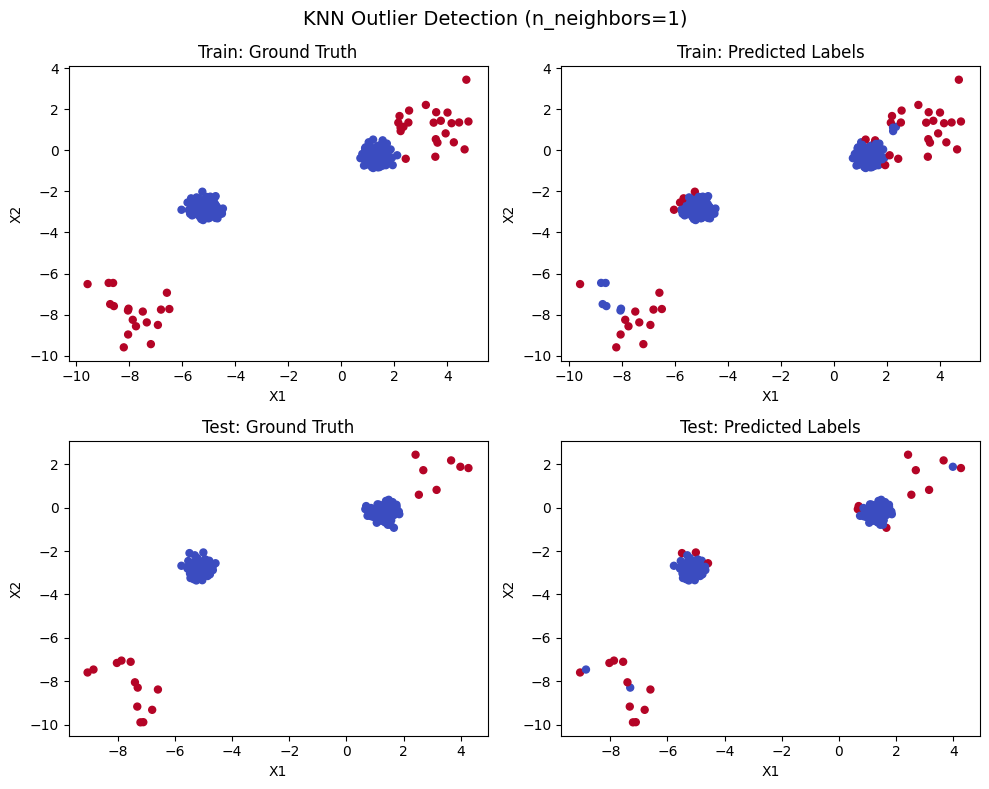

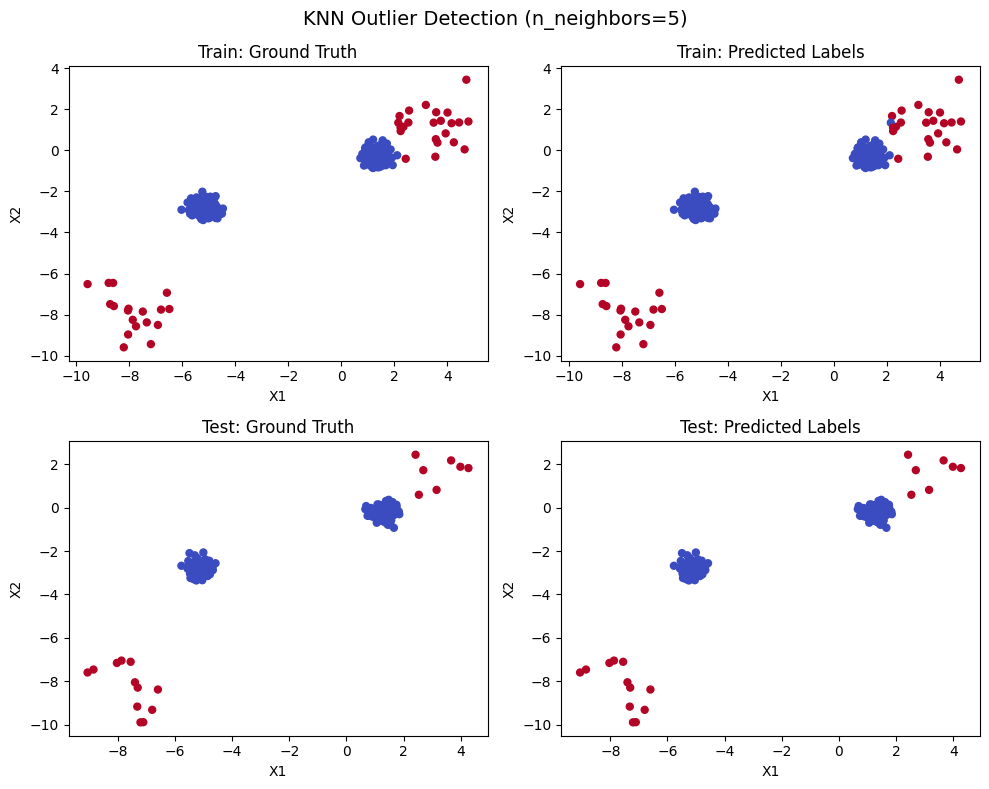

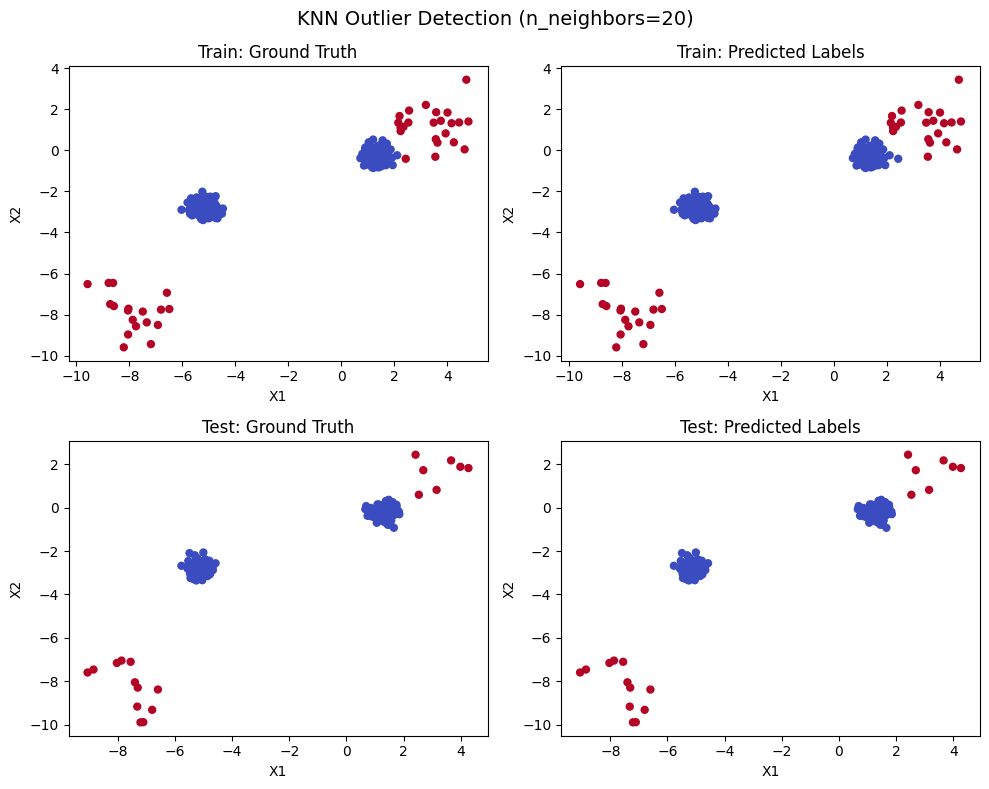

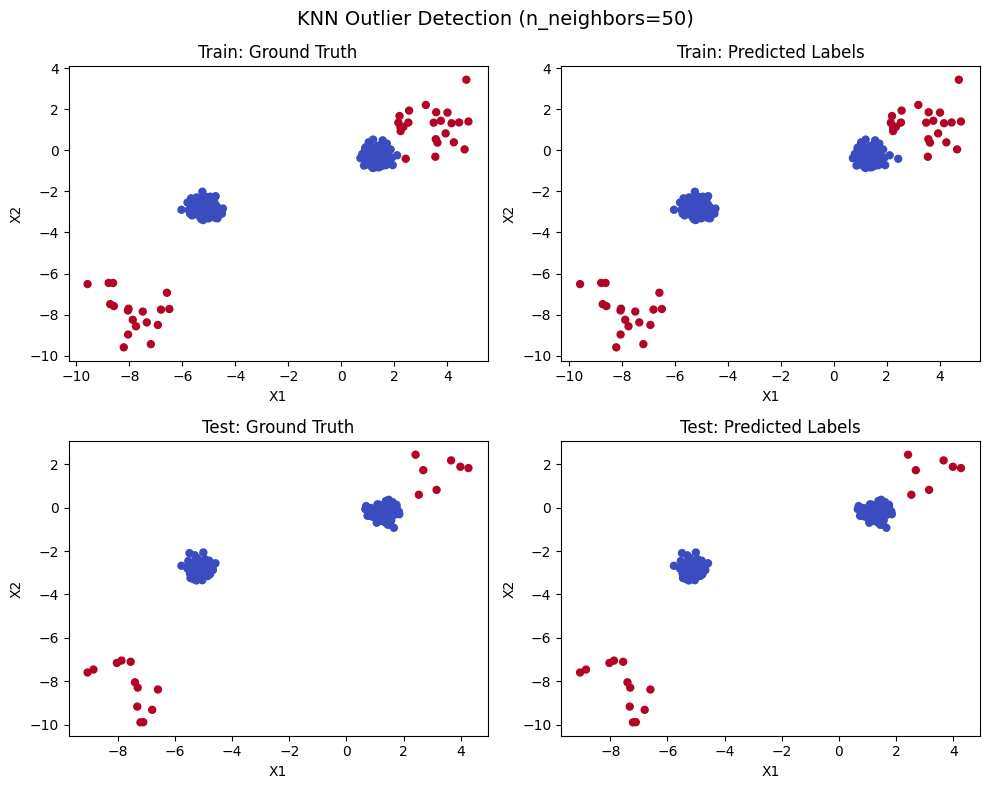

n_neighbors= 1 → Balanced Accuracy = 0.904
n_neighbors= 5 → Balanced Accuracy = 1.000
n_neighbors=20 → Balanced Accuracy = 1.000
n_neighbors=50 → Balanced Accuracy = 1.000


In [ ]:
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data_clusters
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=400, n_test=200, n_clusters=2, contamination=0.1, random_state=42
)

n_neighbors_list = [1, 5, 20, 50]
accuracies = []

for n_neighbors in n_neighbors_list:
    model = KNN(n_neighbors=n_neighbors)
    model.fit(X_train)

    y_train_pred = model.labels_
    y_test_pred = model.predict(X_test)

    acc = balanced_accuracy_score(y_test, y_test_pred)
    accuracies.append(acc)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(f"KNN Outlier Detection (n_neighbors={n_neighbors})", fontsize=14)

    axes[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=25)
    axes[0, 0].set_title("Train: Ground Truth")

    axes[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', s=25)
    axes[0, 1].set_title("Train: Predicted Labels")

    axes[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=25)
    axes[1, 0].set_title("Test: Ground Truth")

    axes[1, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', s=25)
    axes[1, 1].set_title("Test: Predicted Labels")

    for ax in axes.ravel():
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")

    plt.tight_layout()
    plt.show()

for n_neighbors, acc in zip(n_neighbors_list, accuracies):
    print(f"n_neighbors={n_neighbors:2d} → Balanced Accuracy = {acc:.3f}")


Task 3

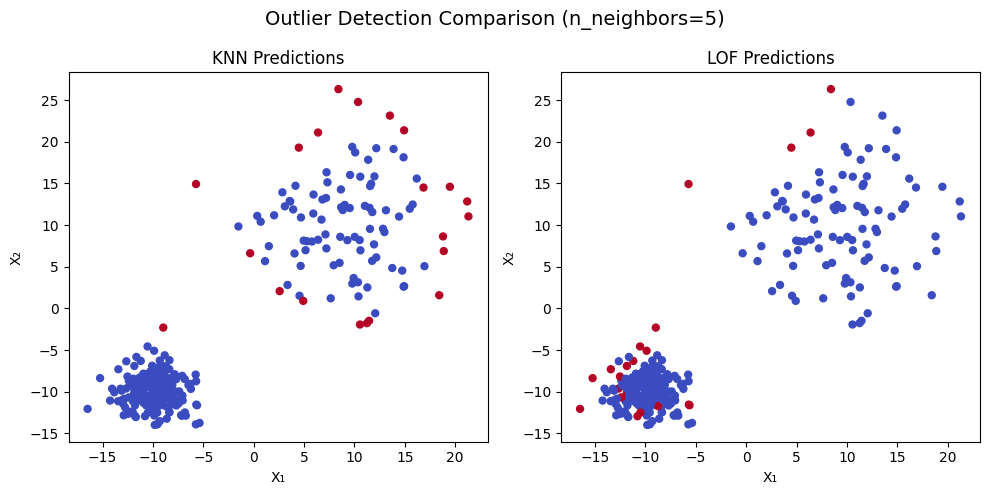

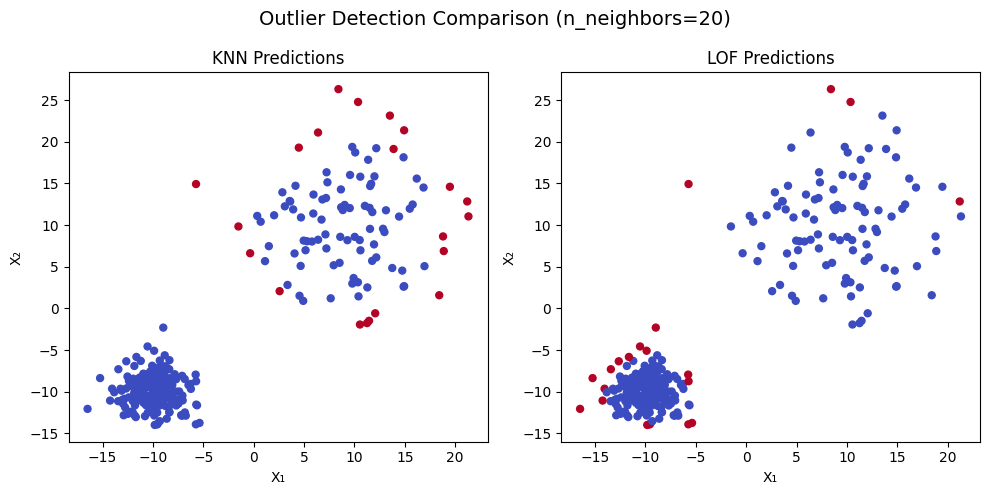

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF

X1, _ = make_blobs(n_samples=200, centers=[(-10, -10)], cluster_std=2, random_state=42)
X2, _ = make_blobs(n_samples=100, centers=[(10, 10)], cluster_std=6, random_state=42)
X = np.vstack((X1, X2))

contamination = 0.07
neighbors_list = [5, 20]

for n_neighbors in neighbors_list:
    knn = KNN(contamination=contamination, n_neighbors=n_neighbors)
    lof = LOF(contamination=contamination, n_neighbors=n_neighbors)

    knn.fit(X)
    lof.fit(X)

    y_pred_knn = knn.labels_
    y_pred_lof = lof.labels_

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Outlier Detection Comparison (n_neighbors={n_neighbors})", fontsize=14)

    axes[0].scatter(X[:, 0], X[:, 1], c=y_pred_knn, cmap='coolwarm', s=25)
    axes[0].set_title("KNN Predictions")
    axes[0].set_xlabel("X₁")
    axes[0].set_ylabel("X₂")

    axes[1].scatter(X[:, 0], X[:, 1], c=y_pred_lof, cmap='coolwarm', s=25)
    axes[1].set_title("LOF Predictions")
    axes[1].set_xlabel("X₁")
    axes[1].set_ylabel("X₂")

    plt.tight_layout()
    plt.show()


Task 4

In [2]:
!pip install combo
!pip install pyod

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.5 MB/s eta 0:00:00
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42855 sha256=4ef9fa83fb129de7e1740c6b756b625ac8905a3676d6409a6ae11edf6efe76eb
  Stored in directory: /root/.cache/pip/wheels/21/e7/9e/8baa8e183e9e3d7e37b74c5c0083462d91fb34123b92abb6ad
Successfully built combo


In [4]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

data = loadmat('cardio.mat')
X = data['X']
y = data['y'].ravel()

contamination = 0.096

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_train_norm, X_test_norm = standardizer(X_train, X_test)

MODEL_TYPE = 'knn'
neighbor_values = np.linspace(30, 120, 10, dtype=int)
train_scores_list = []
test_scores_list = []

print(f"\nTraining {MODEL_TYPE.upper()} ensemble with 10 models...\n")

for n_neighbors in neighbor_values:
    if MODEL_TYPE == 'knn':
        model = KNN(n_neighbors=n_neighbors, contamination=contamination)
    else:
        model = LOF(n_neighbors=n_neighbors, contamination=contamination)

    model.fit(X_train_norm)

    y_train_pred = model.labels_
    y_test_pred = model.predict(X_test_norm)

    train_scores_list.append(model.decision_scores_)
    test_scores_list.append(model.decision_function(X_test_norm))

    ba_train = balanced_accuracy_score(y_train, y_train_pred)
    ba_test = balanced_accuracy_score(y_test, y_test_pred)
    print(f"n_neighbors={n_neighbors:3d} | BA_train={ba_train:.4f} | BA_test={ba_test:.4f}")

train_scores = np.column_stack(train_scores_list)
test_scores = np.column_stack(test_scores_list)

print(f"\nTrain scores shape: {train_scores.shape}")
print(f"Test scores shape: {test_scores.shape}")

train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

avg_train_scores = average(train_scores_norm)
avg_test_scores = average(test_scores_norm)

max_train_scores = maximization(train_scores_norm)
max_test_scores = maximization(test_scores_norm)

threshold_avg = np.quantile(avg_train_scores, 1 - contamination)
threshold_max = np.quantile(max_train_scores, 1 - contamination)

print(f"\nThreshold (average): {threshold_avg:.4f}")
print(f"Threshold (maximization): {threshold_max:.4f}")

y_test_pred_avg = (avg_test_scores > threshold_avg).astype(int)
y_test_pred_max = (max_test_scores > threshold_max).astype(int)

ba_avg = balanced_accuracy_score(y_test, y_test_pred_avg)
ba_max = balanced_accuracy_score(y_test, y_test_pred_max)

print("\n" + "="*50)
print("ENSEMBLE RESULTS")
print("="*50)
print(f"Average Strategy      → BA: {ba_avg:.4f}")
print(f"Maximization Strategy → BA: {ba_max:.4f}")
print("="*50)


Training KNN ensemble with 10 models...

n_neighbors= 30 | BA_train=0.7128 | BA_test=0.6623
n_neighbors= 40 | BA_train=0.7233 | BA_test=0.6702
n_neighbors= 50 | BA_train=0.7337 | BA_test=0.6774
n_neighbors= 60 | BA_train=0.7494 | BA_test=0.6996
n_neighbors= 70 | BA_train=0.7546 | BA_test=0.7281
n_neighbors= 80 | BA_train=0.7651 | BA_test=0.7289
n_neighbors= 90 | BA_train=0.7598 | BA_test=0.7146
n_neighbors=100 | BA_train=0.7651 | BA_test=0.7225
n_neighbors=110 | BA_train=0.7703 | BA_test=0.7225
n_neighbors=120 | BA_train=0.7703 | BA_test=0.7154

Train scores shape: (1098, 10)
Test scores shape: (733, 10)

Threshold (average): 0.9885
Threshold (maximization): 1.0759

ENSEMBLE RESULTS
Average Strategy      → BA: 0.7067
Maximization Strategy → BA: 0.6996
